In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [34]:
wft_1_2 = r"1_2_WFT_independent_agents/output_data copy/"
wft_1_3 = r"1_3_WFT_independent_agents_with_memory_sharing/output_data copy/"
wft_3_1_2 = r"3_1_2_WFT_shared_positions_and_memory/output_data copy/"
wft_1_4 = r"1_4_WFT_independent_agents_with_Consensus/output_data copy/"

In [35]:
x = np.arange(0,200)

# Score History

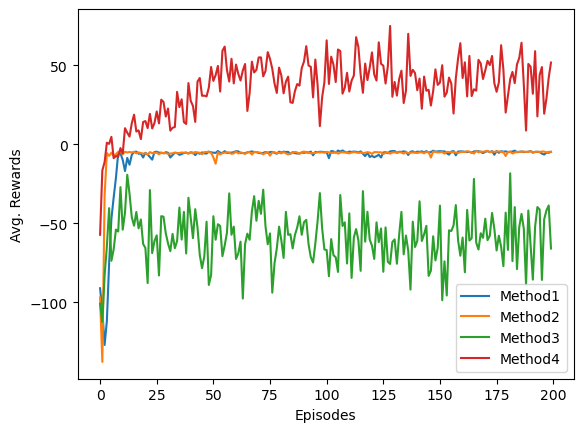

In [24]:
# Dataset
y = np.stack((np.loadtxt(wft_1_2+"score_history.csv", delimiter=",", dtype=np.float32)
              , np.loadtxt(wft_1_3+"score_history.csv", delimiter=",", dtype=np.float32)
              , np.loadtxt(wft_3_1_2+"score_history.csv", delimiter=",", dtype=np.float32)
              , np.loadtxt(wft_1_4+"score_history.csv", delimiter=",", dtype=np.float32)[0:200]), axis=1)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 200)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_, label=["Method1", "Method2", "Method3", "Method4"])
plt.xlabel("Episodes")
plt.ylabel("Avg. Rewards")
plt.legend()
plt.show()

# Coverage Ratio

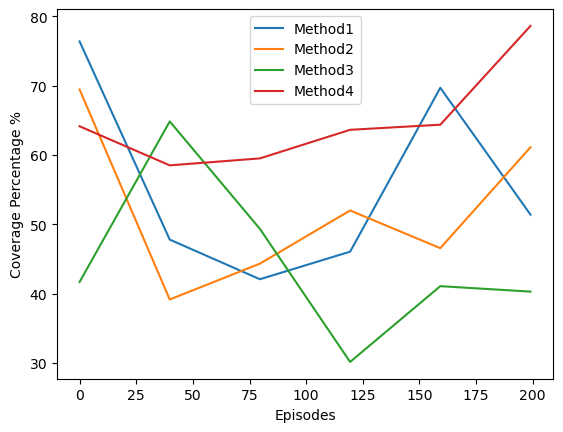

In [25]:
# Dataset
y = np.stack((np.loadtxt(wft_1_2+"coverage_ratio_history.csv", delimiter=",", dtype=np.float32)
              , np.loadtxt(wft_1_3+"coverage_ratio_history.csv", delimiter=",", dtype=np.float32)
              , np.loadtxt(wft_3_1_2+"coverage_ratio_history.csv", delimiter=",", dtype=np.float32)
              , np.loadtxt(wft_1_4+"coverage_ratio_history.csv", delimiter=",", dtype=np.float32)[0:200]), axis=1)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 6)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_, label=["Method1", "Method2", "Method3", "Method4"])
plt.xlabel("Episodes")
plt.ylabel("Coverage Percentage %")
plt.legend()
plt.show()

In [12]:
np.mean(y, axis=0)

array([47.249966, 48.99999 , 42.74997 , 64.15513 ], dtype=float32)

In [14]:
y[len(y)-1]

array([51.389, 61.111, 40.278, 78.621], dtype=float32)

# Fastest Coverage

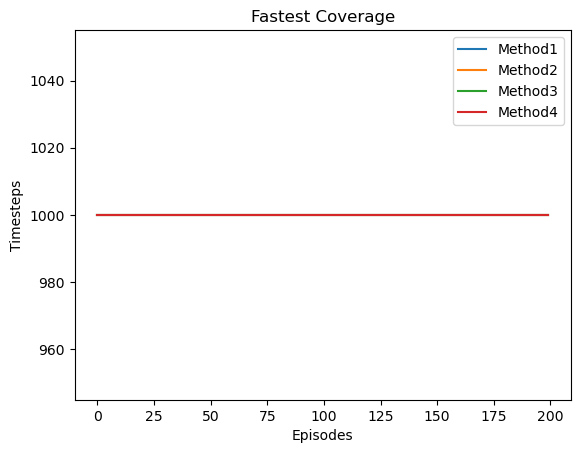

In [115]:
# Dataset
y = np.stack((np.loadtxt(wft_1_2+"coverage_fast_history.csv", delimiter=",", dtype=np.float32)
              , np.loadtxt(wft_1_3+"coverage_fast_history.csv", delimiter=",", dtype=np.float32)
              , np.loadtxt(wft_3_1_2+"coverage_fast_history.csv", delimiter=",", dtype=np.float32)
              , np.loadtxt(wft_1_4+"coverage_fast_history.csv", delimiter=",", dtype=np.float32)[0:200]), axis=1)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 6)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_, label=["Method1", "Method2", "Method3", "Method4"])
plt.title("Fastest Coverage")
plt.xlabel("Episodes")
plt.ylabel("Timesteps")
plt.legend()
plt.show()

# Fastest Tracking

In [16]:
wft_1_2_tracker = np.loadtxt(wft_1_2+"tracker_fast_history.csv", delimiter=",", dtype=np.float32)
wft_1_2_tracker[wft_1_2_tracker==0.0] = 1001.0
wft_1_2_tracker_min = np.min(wft_1_2_tracker, axis = 1)
wft_1_2_tracker[wft_1_2_tracker==1001.0] = 0.0
wft_1_2_tracker_max = np.max(wft_1_2_tracker, axis = 1)

wft_1_3_tracker = np.loadtxt(wft_1_3+"tracker_fast_history.csv", delimiter=",", dtype=np.float32)
wft_1_3_tracker[wft_1_3_tracker==0.0] = 1001.0
wft_1_3_tracker_min = np.min(wft_1_3_tracker, axis = 1)
wft_1_3_tracker[wft_1_3_tracker==1001.0] = 0.0
wft_1_3_tracker_max = np.max(wft_1_3_tracker, axis = 1)

wft_3_1_2_tracker = np.loadtxt(wft_3_1_2+"tracker_fast_history.csv", delimiter=",", dtype=np.float32)
wft_3_1_2_tracker[wft_3_1_2_tracker==0.0] = 1001.0
wft_3_1_2_tracker_min = np.min(wft_3_1_2_tracker, axis = 1)
wft_3_1_2_tracker[wft_3_1_2_tracker==1001.0] = 0.0
wft_3_1_2_tracker_max = np.max(wft_3_1_2_tracker, axis = 1)

wft_1_4_tracker = np.loadtxt(wft_1_4+"tracker_fast_history.csv", delimiter=",", dtype=np.float32)[0:200]
wft_1_4_tracker[wft_1_4_tracker==0.0] = 1001.0
wft_1_4_tracker_min = np.min(wft_1_4_tracker, axis = 1)
wft_1_4_tracker[wft_1_4_tracker==1001.0] = 0.0
wft_1_4_tracker_max = np.max(wft_1_4_tracker, axis = 1)

In [17]:
y_min = np.stack((wft_1_2_tracker_min, wft_1_3_tracker_min, wft_3_1_2_tracker_min, wft_1_4_tracker_min), axis=1)
y_max = np.stack((wft_1_2_tracker_max, wft_1_3_tracker_max, wft_3_1_2_tracker_max, wft_1_4_tracker_max), axis=1)

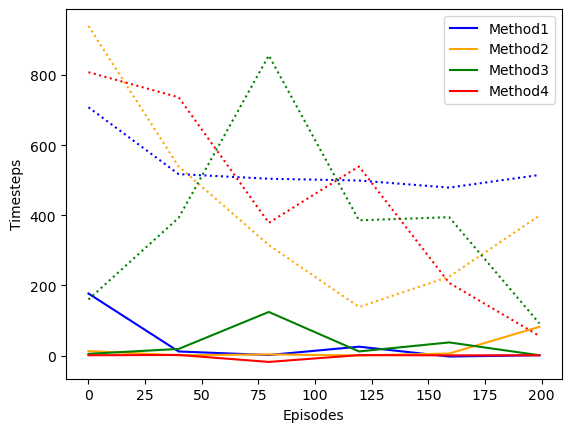

In [26]:
X_Y_Spline_min = make_interp_spline(x, y_min)
X_Y_Spline_max = make_interp_spline(x, y_max)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 6)
Y_min = X_Y_Spline_min(X_)
Y_max = X_Y_Spline_max(X_)
 
# Plotting the Graph
colors=["blue", "orange", "green", "red"]
labels=["Method1", "Method2", "Method3", "Method4"]
for i in range(4):
    plt.plot(X_, Y_min[:,i], label=labels[i], color=colors[i])
    plt.plot(X_, Y_max[:,i], linestyle = 'dotted', color=colors[i])
plt.xlabel("Episodes")
plt.ylabel("Timesteps")
plt.legend()
plt.show()

In [19]:
print("Min Mean: ", np.mean(y_min, axis=0))
print("Max Mean: ", np.mean(y_max, axis=0))

Min Mean:  [49.125 26.12  37.    18.91 ]
Max Mean:  [487.03  497.855 478.365 479.6  ]


In [20]:
print("Min last: ", y_min[len(y_min)-1])
print("Max last: ", y_max[len(y_max)-1])

Min last:  [ 1. 82.  1.  1.]
Max last:  [515. 399.  92.  56.]


# Fire Fallout

In [36]:
wft_1_2_fireout = np.loadtxt(wft_1_2+"fire_fallout.csv", delimiter=",", dtype=np.float32)
wft_1_2_fireout[wft_1_2_fireout==0.0] = -100

wft_1_3_fireout = np.loadtxt(wft_1_3+"fire_fallout.csv", delimiter=",", dtype=np.float32)
wft_1_3_fireout[wft_1_3_fireout==0.0] = -100

wft_3_1_2_fireout = np.loadtxt(wft_3_1_2+"fire_fallout.csv", delimiter=",", dtype=np.float32)
wft_3_1_2_fireout[wft_3_1_2_fireout==0.0] = -100

wft_1_4_fireout = np.loadtxt(wft_1_4+"fire_fallout.csv", delimiter=",", dtype=np.float32)[0:200]
wft_1_4_fireout[wft_1_4_fireout==0.0] = -100

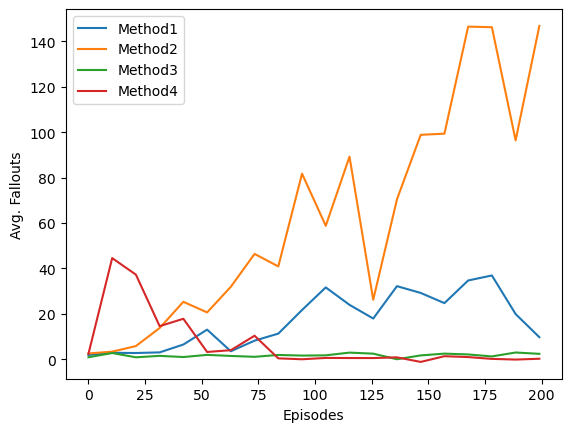

In [38]:
y = np.stack((np.mean(np.loadtxt(wft_1_2+"fire_fallout.csv", delimiter=",", dtype=np.float32), axis=1)
              , np.mean(np.loadtxt(wft_1_3+"fire_fallout.csv", delimiter=",", dtype=np.float32), axis=1)
              , np.mean(np.loadtxt(wft_3_1_2+"fire_fallout.csv", delimiter=",", dtype=np.float32), axis=1)
              , np.mean(np.loadtxt(wft_1_4+"fire_fallout.csv", delimiter=",", dtype=np.float32), axis=1)[0:200]), axis=1)

X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 20)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_, label=["Method1", "Method2", "Method3", "Method4"])
plt.xlabel("Episodes")
plt.ylabel("Avg. Fallouts")
plt.legend()
plt.show()

# Environment Fallout

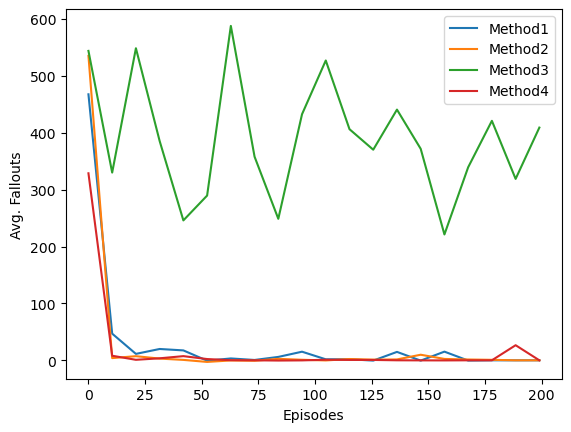

In [39]:
y = np.stack((np.mean(np.loadtxt(wft_1_2+"env_fallout.csv", delimiter=",", dtype=np.float32), axis=1)
              , np.mean(np.loadtxt(wft_1_3+"env_fallout.csv", delimiter=",", dtype=np.float32), axis=1)
              , np.mean(np.loadtxt(wft_3_1_2+"env_fallout.csv", delimiter=",", dtype=np.float32), axis=1)
              , np.mean(np.loadtxt(wft_1_4+"env_fallout.csv", delimiter=",", dtype=np.float32), axis=1)[0:200]), axis=1)

X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 20)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_, label=["Method1", "Method2", "Method3", "Method4"])
plt.xlabel("Episodes")
plt.ylabel("Avg. Fallouts")
plt.legend()
plt.show()

In [22]:
np.mean(y, axis=0)

array([ 20.3475   ,   9.636667 , 339.3159   ,   4.4491673], dtype=float32)

In [23]:
y[len(y)-1]

array([  0.     ,   0.     , 409.16666,   0.     ], dtype=float32)